In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.

from sklearn.datasets import load_digits

In [2]:
# load mnist dataset
mnist = load_digits()

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

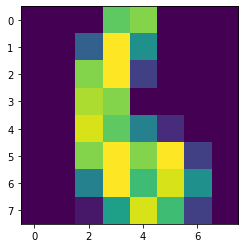

In [4]:
# image from the dataset
data = mnist['images']
plt.imshow(data[6])

In [5]:
# shape fo the dataset of images
print('Shape of data: {}'.format(data.shape))

Shape of data: (1797, 8, 8)


### Reshaping data size to (1797, 64)

In [6]:
data = data.reshape(1797, 64)
print('New shape: {}'.format(data.shape))

New shape: (1797, 64)


In [7]:
# calculating Mean for data Normalization
data_mean = np.mean(data, axis = 0)
data_mean.shape

(64,)

In [8]:
# normalized data
data_norm = data - data_mean
data_norm.shape

(1797, 64)

In [9]:
# finding convariance matrix calculation using data norm
cov_matrix = np.cov(data_norm.T)
cov_matrix.shape

(64, 64)

### Finding Eigen Values & Eigen Vectors for the covariance matrix

In [10]:
from scipy.linalg import eigh

In [11]:
eigen_value, eigen_vector = eigh(cov_matrix)

In [12]:
eigen_value.shape

(64,)

In [13]:
eigen_vector.shape

(64, 64)

## 1. Sorting eigen value and vector

In [14]:
# sorting the eigen values in decreaseing order
sorted_eigen_value = eigen_value[: : -1]

In [15]:
sorted_eigen_value

array([ 1.79006930e+02,  1.63717747e+02,  1.41788439e+02,  1.01100375e+02,
        6.95131656e+01,  5.91085249e+01,  5.18845391e+01,  4.40151067e+01,
        4.03109953e+01,  3.70117984e+01,  2.85190412e+01,  2.73211698e+01,
        2.19014881e+01,  2.13243565e+01,  1.76367222e+01,  1.69468639e+01,
        1.58513899e+01,  1.50044602e+01,  1.22344732e+01,  1.08868593e+01,
        1.06935663e+01,  9.58259779e+00,  9.22640260e+00,  8.69036872e+00,
        8.36561190e+00,  7.16577961e+00,  6.91973881e+00,  6.19295508e+00,
        5.88499123e+00,  5.15586690e+00,  4.49129656e+00,  4.24687799e+00,
        4.04743883e+00,  3.94340334e+00,  3.70647245e+00,  3.53165306e+00,
        3.08457409e+00,  2.73780002e+00,  2.67210896e+00,  2.54170563e+00,
        2.28298744e+00,  1.90724229e+00,  1.81716569e+00,  1.68996439e+00,
        1.40197220e+00,  1.29221888e+00,  1.15893419e+00,  9.31220008e-01,
        6.69850594e-01,  4.86065217e-01,  2.52350432e-01,  9.91527944e-02,
        6.31307848e-02,  

In [17]:
# sorting eigen vector
sorted_eigen_vector = eigen_vector[:, :: -1]

In [18]:
sorted_eigen_vector

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.73094651e-02, -1.01064569e-02,  1.83420720e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.23428835e-01, -4.90849204e-02,  1.26475543e-01, ...,
         0.00000000e+00, -5.33263227e-17, -3.07560137e-15],
       ...,
       [-8.94184677e-02,  1.76697117e-01,  2.32084163e-01, ...,
         0.00000000e+00,  1.89816268e-16, -3.54542126e-15],
       [-3.65977111e-02,  1.94547053e-02,  1.67026563e-01, ...,
         0.00000000e+00, -1.05800457e-16, -3.44464248e-16],
       [-1.14684954e-02, -6.69693895e-03,  3.48043832e-02, ...,
         0.00000000e+00, -6.23245092e-17, -5.72506436e-16]])

## 2. Taking the first component

In [19]:
eigen_val = sorted_eigen_value[:2]
eigen_val

array([179.0069301 , 163.71774688])

In [21]:
eigen_vec = sorted_eigen_vector[:, :2]
eigen_vec

array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.73094651e-02, -1.01064569e-02],
       [-2.23428835e-01, -4.90849204e-02],
       [-1.35913304e-01, -9.43337493e-03],
       [-3.30323092e-02, -5.36015636e-02],
       [-9.66340844e-02, -1.17755318e-01],
       [-8.32943805e-03, -6.21281792e-02],
       [ 2.26900082e-03, -7.93574578e-03],
       [-3.20516495e-04, -1.63216259e-04],
       [-1.19308905e-01, -2.10167064e-02],
       [-2.44451676e-01,  6.03485687e-02],
       [ 1.48512745e-01, -5.33769554e-03],
       [-4.67319410e-02, -9.19769205e-02],
       [-2.17740744e-01, -5.19210493e-02],
       [-1.48136776e-02, -5.89354684e-02],
       [ 4.47779518e-03, -3.33283413e-03],
       [-4.94136398e-05, -4.22872096e-05],
       [-7.95419375e-02,  3.62458505e-02],
       [ 8.33951454e-02,  1.98257337e-01],
       [ 2.15915342e-01, -4.86386550e-02],
       [-1.72126801e-01, -2.25574894e-01],
       [-1.63712098e-01, -4.50541862e-03],
       [ 2.86444452e-02,  2.67696727e-02],
       [ 4.

## 3. Dimensionality Reduction 

In [22]:
no_of_component = 2
reduced_data_2d = np.dot(data, eigen_vec)
reduced_data_2d.shape

(1797, 2)

## 4. Visualize the lower dimension data 

In [23]:
df = pd.DataFrame(data = reduced_data_2d, columns = ('col1', 'col2'))
df['target'] = mnist.target.reshape(len(mnist.target), -1)

In [24]:
df.head(10)

,col1,col2,target
0,-0.928679,19.554616,0
1,8.288399,-22.488966,1
2,7.322710,-11.676253,2
3,-15.575318,1.612197,3
4,23.637655,2.548794,4
5,-13.756299,6.194181,5
6,21.694197,3.568073,6
7,-2.621820,-22.791931,7
8,-4.924347,-0.536907,8
9,-5.149412,6.356057,9


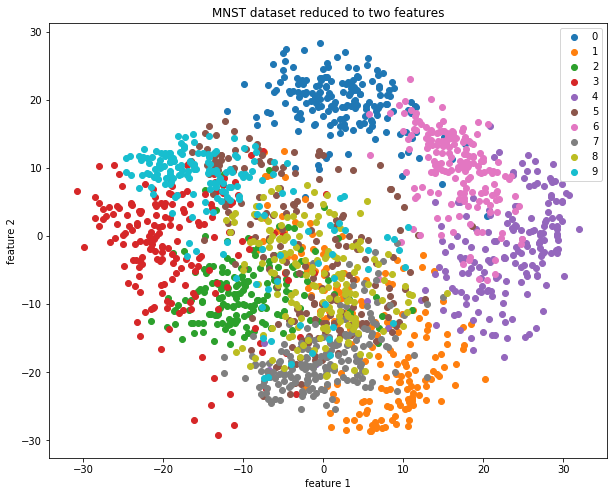

In [30]:
# plotting the figure with reduced to 2 feature
plt.figure(figsize = (10, 8))
unique_target = set(mnist.target)

for i in unique_target:
    plt.scatter(df[df.target == i]['col1'], df[df.target == i]['col2'], label = i)
    
plt.title('MNST dataset reduced to two features')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
    
plt.legend()
plt.show()

## 5. Number of compenent according to variance explained

In [31]:
explained_varience = []
total_variance = []
total_eigen_values = sum(sorted_eigen_value)

for i in range(0, 64):
    e_var = sorted_eigen_value[i] / total_eigen_values
    explained_varience.append(e_var)
    
    t_var = sum(explained_varience[: i])
    total_variance.append(t_var)

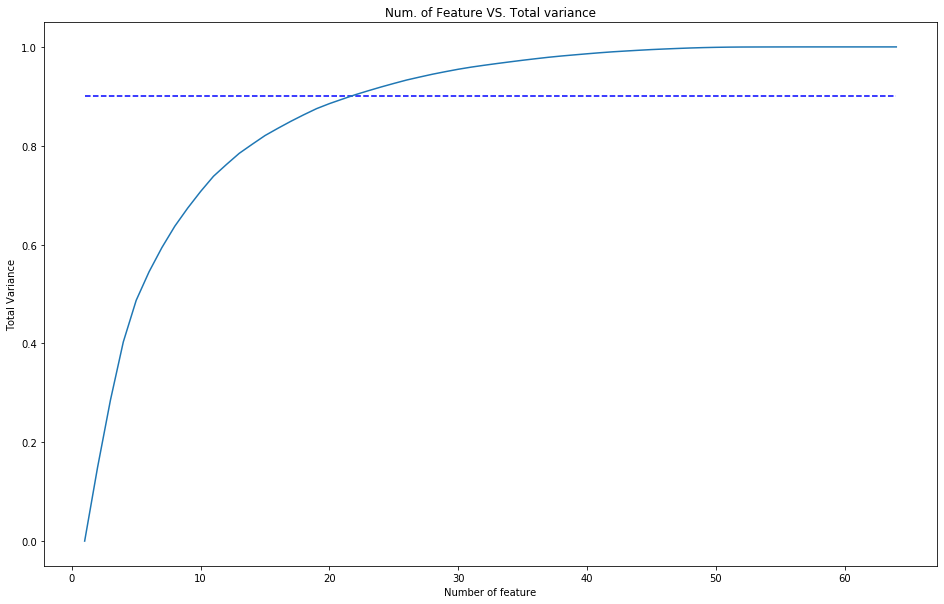

In [35]:
# plotting the figure
plt.figure(figsize = (16, 10))
plt.plot(np.arange(1, 65, 1), total_variance)
plt.hlines(y = 0.9, xmin = 1, xmax = 64, color = 'b', linestyles = '--')

plt.title('Num. of Feature VS. Total variance')
plt.xlabel('Number of feature')
plt.ylabel('Total Variance')

plt.show()